<a href="https://colab.research.google.com/github/khixson1/US-Debt-to-GDP/blob/main/US_Debt_vs_Gross_Domestic_Product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Visualization of US Debt versus Gross Domestic Product (GDP)


Kim Hixson

In [315]:
# Mount Drive in Google's Collaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [316]:
# import pandas, numpy, seaborn, and matlibplot libraries
# upload US GDP vs Debt.xlsx data
# read US GDP vs Debt.xlsx into collaboratory
# check dataframe using head function

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filename = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Week_4/Data_Uploads/US GDP vs Debt.xlsx"
df = pd.read_excel(filename)
display(df.head())
display(df.info())
display(df.describe())

,Quarter,Gross Domestic Product ($mil),Total Public Debt ($mil)
0,1947-01-01,243.164,NaN
1,1947-04-01,245.968,NaN
2,1947-07-01,249.585,NaN
3,1947-10-01,259.745,NaN
4,1948-01-01,265.742,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Quarter                        295 non-null    datetime64[ns]
 1   Gross Domestic Product ($mil)  295 non-null    float64       
 2   Total Public Debt ($mil)       218 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.0 KB


None

,Gross Domestic Product ($mil),Total Public Debt ($mil)
count,295.000000,2.180000e+02
mean,6346.288305,6.295722e+06
std,6434.597480,6.665300e+06
min,243.164000,3.160970e+05
25%,739.757000,8.311682e+05
50%,3794.706000,4.291265e+06
75%,10841.079500,8.636912e+06
max,21747.394000,2.647724e+07


In [317]:
# impute NaN values to 0 in Total Public Debt column
# check df using info function

tot_pub_debt = pd.DataFrame(df['Total Public Debt ($mil)'].fillna(0))
df['Total Public Debt ($mil)'] = tot_pub_debt['Total Public Debt ($mil)']
display(df.head())
display(df.info())

,Quarter,Gross Domestic Product ($mil),Total Public Debt ($mil)
0,1947-01-01,243.164,0.0
1,1947-04-01,245.968,0.0
2,1947-07-01,249.585,0.0
3,1947-10-01,259.745,0.0
4,1948-01-01,265.742,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Quarter                        295 non-null    datetime64[ns]
 1   Gross Domestic Product ($mil)  295 non-null    float64       
 2   Total Public Debt ($mil)       295 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.0 KB


None

In [318]:
# drop last row to remove missing 'Total Public Debt' missing value and view dataframe info and tail

df = df.head(-1)
display(df.info())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Quarter                        294 non-null    datetime64[ns]
 1   Gross Domestic Product ($mil)  294 non-null    float64       
 2   Total Public Debt ($mil)       294 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.0 KB


None

,Quarter,Gross Domestic Product ($mil),Total Public Debt ($mil)
289,2019-04-01,21329.877,22023283.0
290,2019-07-01,21540.325,22719402.0
291,2019-10-01,21747.394,23201380.0
292,2020-01-01,21561.139,23223813.0
293,2020-04-01,19520.114,26477241.0


In [319]:
# convert GDP and Total Public Debt to trillions and GDP to billions
debt_tril = pd.DataFrame(df['Total Public Debt ($mil)'] * 0.000001)
GDP_bil = pd.DataFrame(df['Gross Domestic Product ($mil)'] * 0.001)

# viewing new dataframes
display(debt_tril.tail())
display(GDP_bil.tail())

,Total Public Debt ($mil)
289,22.023283
290,22.719402
291,23.201380
292,23.223813
293,26.477241


,Gross Domestic Product ($mil)
289,21.329877
290,21.540325
291,21.747394
292,21.561139
293,19.520114


In [320]:
# rename columns in new dataframes
debt_tril.rename(columns={'Total Public Debt ($mil)': 'Total Public Debt (trillions $)'}, inplace = True)
GDP_bil.rename(columns={'Gross Domestic Product ($mil)': 'Gross Domestic Product (billions $)'}, inplace = True)

# viewing renamed dataframes
display(debt_tril.tail())
display(GDP_bil.tail())


,Total Public Debt (trillions $)
289,22.023283
290,22.719402
291,23.201380
292,23.223813
293,26.477241


,Gross Domestic Product (billions $)
289,21.329877
290,21.540325
291,21.747394
292,21.561139
293,19.520114


In [321]:
# replace Total Public Debt and Gross Domestic Product column data with numbers in the trillions and billions, respectively

# selecting just Quarter column from original dataframe 
df_quar = pd.DataFrame(df['Quarter'])
df_quar

# creating new dataframe using join
df_1 = df_quar.reset_index(drop=True).join(GDP_bil)
df_new = df_1.reset_index(drop = True).join(debt_tril)

# viewing new dataframe
df_new

,Quarter,Gross Domestic Product (billions $),Total Public Debt (trillions $)
0,1947-01-01,0.243164,0.000000
1,1947-04-01,0.245968,0.000000
2,1947-07-01,0.249585,0.000000
3,1947-10-01,0.259745,0.000000
4,1948-01-01,0.265742,0.000000
...,...,...,...
289,2019-04-01,21.329877,22.023283
290,2019-07-01,21.540325,22.719402
291,2019-10-01,21.747394,23.201380
292,2020-01-01,21.561139,23.223813


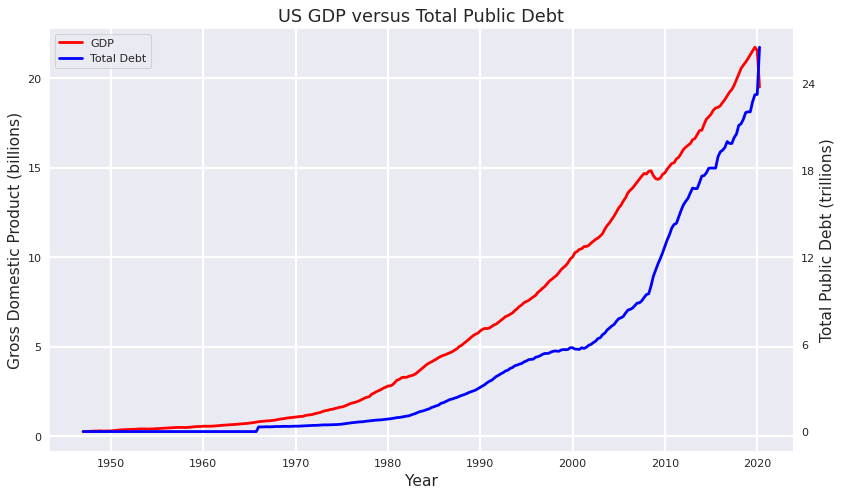

In [327]:
# create a parasite plot, overlaying GDP with Total Debt

from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure

sns.set_style("dark")

# set figure size and resolution)
figure(figsize= (12, 7), dpi = 80)

# name first plot and second plot which will overlay first plot
host = host_subplot(111)
par = host.twinx()

# set x and y labels and font size of first plot
host.set_xlabel("Year", fontsize = 14)
host.set_ylabel("Gross Domestic Product (billions)", fontsize = 14)

# set y lablel and font size of second plot
par.set_ylabel("Total Public Debt (trillions)", fontsize = 14)
plt.title('US GDP versus Total Public Debt', fontsize = 16)

# create plot using plot from matplotlib
host.plot(df_new['Quarter'], df_new['Gross Domestic Product (billions $)'], label="GDP", color='red', linewidth=2.5);
par.plot(df_new['Quarter'], df_new['Total Public Debt (trillions $)'], label="Total Debt", color='blue', linewidth=2.5);

# add grid and set number of tick on y axis
plt.grid(color='w', linestyle='-', linewidth=2, axis = 'both')
host.yaxis.set_major_locator(plt.MaxNLocator(5))
par.yaxis.set_major_locator(plt.MaxNLocator(5))

# remove the tick marks from y axis
host.tick_params(left = False)
par.tick_params(right = False)

# add legend
plt.legend()

# show plot
plt.show()
